In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/datasets_1057_1913_AirPassengers.csv')

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data['Month']=pd.to_datetime(data['Month'])
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data_ind=data.set_index(['Month'])
data_ind

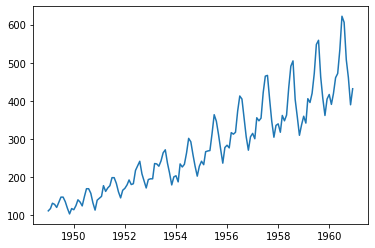

In [ ]:
import matplotlib.pylab as plt
plt.plot(data_ind)
plt.show()

In [ ]:
rolmean = data_ind.rolling(window=12).mean()
rolstd = data_ind.rolling(window=12).std()

rolmean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


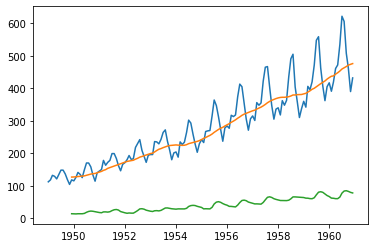

In [ ]:
plot1=plt.plot(data_ind)
plot2=plt.plot(rolmean)
plot3=plt.plot(rolstd)

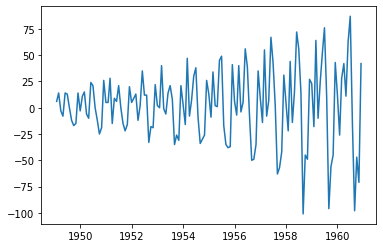

In [ ]:
data_shift = data_ind - data_ind.shift()
plt.plot(data_shift)

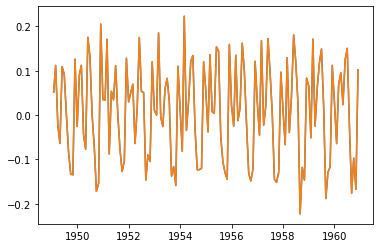

In [ ]:
data_logshift = np.log(data_ind) - np.log(data_ind).shift()
plt.plot(data_logshift)
data_logshift.dropna(inplace=True)
plt.plot(data_logshift)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_logshift, nlags=30)
lag_pacf = pacf(data_logshift,  nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


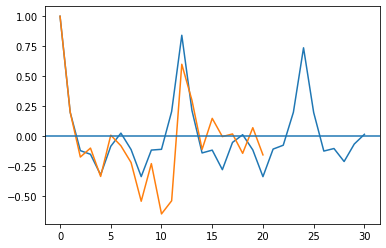

In [ ]:
plt.plot(lag_acf)
plt.plot(lag_pacf)
plt.axhline(y=0)

P=2, Q=2

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
data_log = np.log(data_ind)
data_log.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model=ARIMA(data_log, order=(2,1,2))
results = model.fit(disp=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

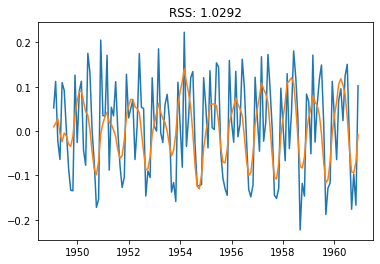

In [ ]:
plt.plot(data_logshift)
plt.plot(results.fittedvalues)
plt.title('RSS: %.4f'%sum((results.fittedvalues - data_logshift['#Passengers'])**2))

In [ ]:
pred_ARIMA_diff=pd.Series(results.fittedvalues,copy=True)
pred_ARIMA_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [ ]:
pred_ARIMA_cum = pred_ARIMA_diff.cumsum()

In [ ]:
predictions_ARIMA_log = pd.Series(data_log['#Passengers'].iloc[0], index=data_log.index)
print(predictions_ARIMA_log)

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64


In [ ]:
predictions_ARIMA_log = predictions_ARIMA_log.add(pred_ARIMA_cum, fill_value=0)

In [ ]:
predictions_ARIMA_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
                ...   
1960-08-01    6.091052
1960-09-01    5.998702
1960-10-01    5.904689
1960-11-01    5.834765
1960-12-01    5.826638
Length: 144, dtype: float64

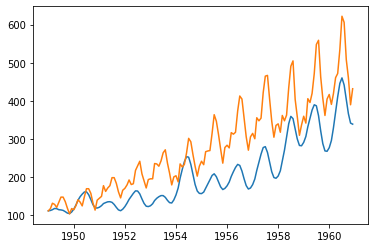

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA)
plt.plot(data_ind)

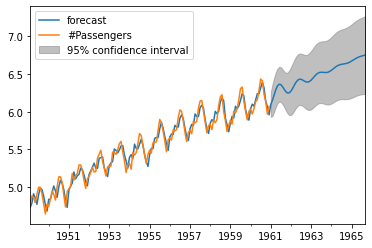

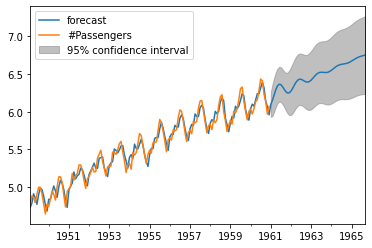

In [ ]:
results.plot_predict(1,200) 

In [ ]:
x=results.forecast(steps=120)
print(np.exp(x[2]))

[[ 376.60487834  523.15155889]
 [ 380.74445106  580.27350885]
 [ 402.49690365  633.4441691 ]
 [ 429.68005131  679.78812927]
 [ 451.35894298  714.10606621]
 [ 461.00790364  730.53137134]
 [ 458.20243771  726.60482985]
 [ 446.09618266  707.86374325]
 [ 428.50662243  686.52640535]
 [ 409.46658485  674.58588292]
 [ 393.6717368   678.06901702]
 [ 385.26398161  696.85308406]
 [ 386.09018098  727.37756131]
 [ 395.2249132   764.59875438]
 [ 409.46255362  802.86324979]
 [ 424.35821469  836.47379115]
 [ 435.74139422  860.48719777]
 [ 441.13979756  872.06093561]
 [ 440.29322459  871.91582187]
 [ 434.66773042  864.60076731]
 [ 426.63132404  856.79853247]
 [ 418.80544807  854.6275198 ]
 [ 413.56042043  861.65754439]
 [ 412.50460844  878.43557632]
 [ 416.07551049  903.07625184]
 [ 423.4352998   932.16269556]
 [ 432.74479144  961.60188501]
 [ 441.75635579  987.44540696]
 [ 448.53796008 1006.75649702]
 [ 452.03796995 1018.4268944 ]
 [ 452.26966099 1023.59161019]
 [ 450.12483247 1025.28170136]
 [ 446.9